<a href="https://colab.research.google.com/github/vasanthi2469/Python-Training/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
toyota = pd.read_csv("/content/ToyotaCorolla.csv")

# Check the structure of the dataset
str(toyota) # for a concise summary or
toyota.info() # for a more detailed overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age (month)        1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


**Relationship between a categorical variable and the series of binary dummy variables**
A categorical variable represents different categories or groups. For example, a variable like Color might contain values like "Red", "Blue", and "Green". These values are non-numeric and cannot be used directly in statistical models.
To handle this, dummy variables (binary variables) are created. For a categorical variable with N categories, we create N-1 dummy variables (also called "one-hot encoding"). Each dummy variable takes a value of 1 or 0, indicating the presence or absence of a particular category.
For example, if the Color variable has three categories: "Red", "Blue", and "Green", we will create two dummy variables:
Color_Red (1 if the color is Red, 0 otherwise)
Color_Blue (1 if the color is Blue, 0 otherwise)
The third category, "Green", is implicitly represented when both Color_Red and Color_Blue are 0.

**The No.of dummy binary variables are required to capture the information in a categorical variable with N categories**
If a categorical variable has N categories, then you need N-1 dummy variables. This is because one category can be used as a reference category, and the remaining categories are represented with binary indicators.
For example, if you have a variable Color with 4 categories (Red, Blue, Green, Yellow), you need 3 dummy variables:
Color_Red
Color_Blue
Color_Green
Yellow is implicitly represented when the other three variables are 0.

In [3]:
import pandas as pd

# Assuming 'toyota' is a pandas DataFrame loaded previously
toyota_dummies = pd.get_dummies(toyota, drop_first=True)

# Display the first few rows of the dummy variables
toyota_dummies.head()

,Id,Price,Age (month),Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
1,2,13750,23,10,2002,72937,90,1,0,2000,...,False,False,False,False,False,False,True,False,False,False
2,3,13950,24,9,2002,41711,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
3,4,14950,26,7,2002,48000,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False
4,5,13750,30,3,2002,38500,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False


In [9]:
# prompt:  Use R to convert the categorical variables in this dataset into dummy variables, and explain in words, for one record, the values in the derived binary dummies.

import pandas as pd

# Load the dataset
toyota = pd.read_csv("/content/ToyotaCorolla.csv")

# Select categorical columns (you might need to adjust this based on your actual data)
categorical_cols = toyota.select_dtypes(include=['object']).columns

# Convert categorical variables to dummy variables
toyota_dummies = pd.get_dummies(toyota, columns=categorical_cols, drop_first=True)

# Display the first few rows of the dataset with dummy variables
print(toyota_dummies.head())

# Example explanation for one record (first row)

# Get the first row of the original data
first_row_original = toyota.iloc[0]

# Get the first row of the transformed data with dummy variables.
first_row_dummies = toyota_dummies.iloc[0]

print("\nOriginal Data (First Row):")
print(first_row_original)

print("\nDummy Variables (First Row):")
print(first_row_dummies)


print("\nExplanation for the first row:")

for col in categorical_cols:
    original_value = first_row_original[col]
    dummy_col_prefix = col + "_"

    print(f"\nOriginal value of {col} is {original_value}")

    for dummy_col in toyota_dummies.columns:
        if dummy_col.startswith(dummy_col_prefix):
            if first_row_dummies[dummy_col] == 1:
                print(f"Dummy variable {dummy_col} is 1, indicating that the {col} was {dummy_col.replace(dummy_col_prefix, '')}")
            else:
                print(f"Dummy variable {dummy_col} is 0, indicating that the {col} was NOT {dummy_col.replace(dummy_col_prefix, '')}")


   Id  Price  Age (month)  Mfg_Month  Mfg_Year     KM  HP  Met_Color  \
0   1  13500           23         10      2002  46986  90          1   
1   2  13750           23         10      2002  72937  90          1   
2   3  13950           24          9      2002  41711  90          1   
3   4  14950           26          7      2002  48000  90          0   
4   5  13750           30          3      2002  38500  90          0   

   Automatic    CC  ...  Fuel_Type_Petrol  Color_Black  Color_Blue  \
0          0  2000  ...             False        False        True   
1          0  2000  ...             False        False       False   
2          0  2000  ...             False        False        True   
3          0  2000  ...             False         True       False   
4          0  2000  ...             False         True       False   

   Color_Green  Color_Grey  Color_Red  Color_Silver  Color_Violet  \
0        False       False      False         False         False   
1       

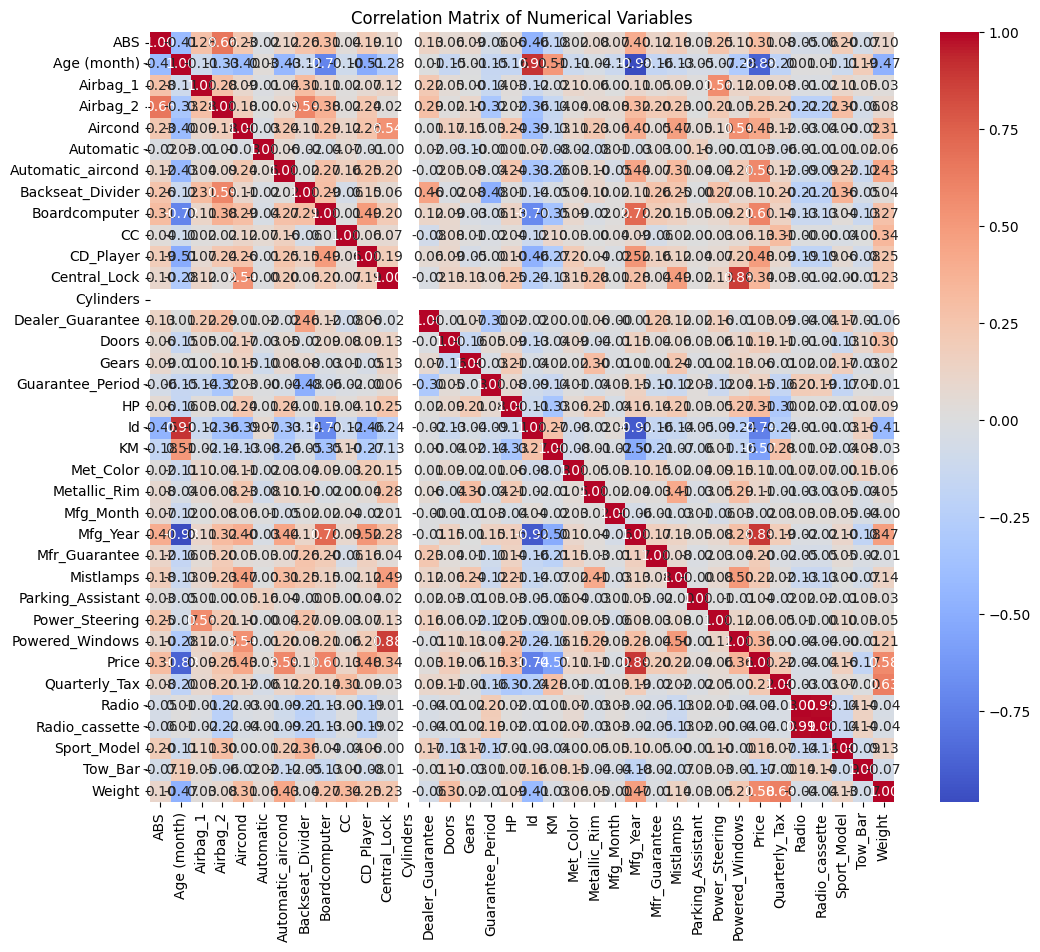

             Age (month)    Price
Age (month)      1.00000 -0.87659
Price           -0.87659  1.00000


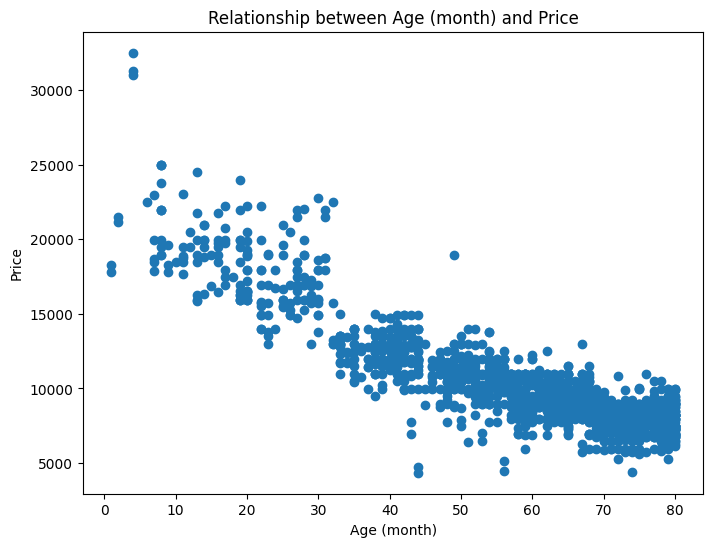

In [12]:
# prompt: Use R to produce a correlation matrix and matrix plot. Comment on the relationships among variables.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'toyota_dummies' DataFrame is already created as in the previous code

# Select numerical columns for correlation analysis
# Include 'Age' (or 'Age_08_04' if it exists) and 'Price' in the numerical columns
numerical_cols = toyota_dummies.select_dtypes(include=['number']).columns
# If 'Age' is the original column name, use it, otherwise check for variations
if 'Age' in toyota_dummies.columns:
    numerical_cols = numerical_cols.union(['Age', 'Price'])
else:
    # Check for potential renamed columns like 'Age_08_04' or similar
    age_cols = [col for col in toyota_dummies.columns if col.startswith('Age')]
    if age_cols:
        numerical_cols = numerical_cols.union(age_cols).union(['Price'])
    else:
        print("Warning: 'Age' column or its variations not found in toyota_dummies. Check data.")

# Calculate the correlation matrix
correlation_matrix = toyota_dummies[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Further analysis (example)
# You can identify highly correlated variables from the heatmap
# and explore their relationships further.  For instance:

# Example:  Check the relationship between 'Age' (or 'Age_08_04') and 'Price'
if 'Age' in toyota_dummies.columns:
    print(toyota_dummies[['Age', 'Price']].corr())  # Use 'Age' if it exists
else:
    if age_cols:  # Use the first found age column if 'Age' is not present
        print(toyota_dummies[[age_cols[0], 'Price']].corr())
    else:
        print("Warning: 'Age' column or its variations not found for correlation analysis.")

# Scatter Plot for visual inspection
if 'Age' in toyota_dummies.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(toyota_dummies['Age'], toyota_dummies['Price'])
    plt.xlabel('Age')
    plt.ylabel('Price')
    plt.title('Relationship between Age and Price')
    plt.show()
else:
    if age_cols:  # Use the first found age column if 'Age' is not present
        plt.figure(figsize=(8, 6))
        plt.scatter(toyota_dummies[age_cols[0]], toyota_dummies['Price'])
        plt.xlabel(age_cols[0])
        plt.ylabel('Price')
        plt.title(f'Relationship between {age_cols[0]} and Price')
        plt.show()
    else:
        print("Warning: 'Age' column or its variations not found for scatter plot.")

# Comments on Relationships:
# Examine the heatmap and individual plots to describe the correlations.
# For example:
# "There is a strong negative correlation between Age and Price, as expected.
#  Older cars tend to have lower prices."

# You would analyze other pairs of variables similarly and provide a more comprehensive
# commentary based on the observations in the correlation matrix and plots.